<h2> <u> Data Cleaning - India Air Quality Data

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

---

> #### Import Data

In [2]:
df = pd.read_csv('/kaggle/input/india-air-quality-data/data.csv' , encoding='mac_roman')

---

#### Data Description

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


<h5> There are a lot of Missing Values in the data

In [5]:
missing_ratio = np.round(df.isna().sum()/len(df)*100,2)
missing_ratio = pd.DataFrame(missing_ratio , columns=['Missing_Ratio'])
missing_ratio.sort_values('Missing_Ratio',ascending=False)

,Missing_Ratio
pm2_5,97.86
spm,54.48
agency,34.30
stn_code,33.06
rspm,9.23
so2,7.95
location_monitoring_station,6.31
no2,3.73
type,1.24
sampling_date,0.00


<h5>The above information shows that the Missing Ratio is very high for some variables<br>
    Since 'pm_2' has a Missing Ratio of 97.86% and 'spm' has a Missing Ratio of 54.48%, we have to drop the Columns,<br>
    Other Columns can be treated

---

<h3> <u>  Dropping columns that are not necessary 

In [6]:
list(df.columns)

['stn_code',
 'sampling_date',
 'state',
 'location',
 'agency',
 'type',
 'so2',
 'no2',
 'rspm',
 'spm',
 'location_monitoring_station',
 'pm2_5',
 'date']

<h5> These Columns can be dropped from the dataset<br>
     - 'stn_code' : As it is just a code and is not important for the Analysis <br>
     - 'sampling_date' : There are two date columns in this dataset, we are dropping this column because the values in this column are in different formats<br>
     - 'pm_2' : Since more than 97% of data is Missing 
     - 'spm' : Since more than 50% of data is Missinf

In [7]:
df.drop(['stn_code','sampling_date','pm2_5','spm'] , axis=1 , inplace=True)

---

<h3> <u> Getting Categorical and Numerical Columns

In [8]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(exclude=['object']).columns)

In [9]:
print('\nNumerical Columns : ' , num_cols)
print('\nCategorical Columns : ' , cat_cols)


Numerical Columns :  ['so2', 'no2', 'rspm']

Categorical Columns :  ['state', 'location', 'agency', 'type', 'location_monitoring_station', 'date']


---

<h3> <u> Handeling Categorical columns 

<h4> <u> 'date' - column

The 'date' column in an object type , we need to convert it to datetime type

In [10]:
df['date'] = pd.to_datetime(df['date'])

Missing Values

In [11]:
df['date'].isna().sum()

7

Since this column has only 7 Missing Values , we can drop the observations

In [12]:
df = df[df['date'].isna()==False]

<br>

<h4> <u> 'type' - column

<h5> Missing Value Treatment

In [13]:
print('The number of missing values are : ',df['type'].isna().sum())

The number of missing values are :  5390


Since there are many missing values , we will replace the missing values as 'NA' (Not Available)

In [14]:
df['type'] = df['type'].fillna('NA')

In [15]:
df['type'].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
NA                                      5390
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

<h5>From the above information we can see that data belonging to the same Type of Area is given different names
<br>We need replace the different names that means the same Type of Area
<br> The Types of Area can be categorized together as : 'Residential,Rural and Others(RRO)' , 'Industrial' , 'Sensitive' & 'NA'<br>

In [16]:
res_str='Residential|RIRUO'
ind_str = 'Industrial'
sen_str = 'Sensitive'

rro_mask = df['type'].str.contains(res_str , regex=True)
ind_mask = df['type'].str.contains(ind_str)
sen_mask = df['type'].str.contains(sen_str)

In [17]:
df['type'][rro_mask] = 'RRO'
df['type'][ind_mask] = 'Industrial'
df['type'][sen_mask] = 'Sensitive'

In [18]:
df['type'].value_counts()

RRO           267266
Industrial    148069
Sensitive      15010
NA              5390
Name: type, dtype: int64

<h5>We have now categorised the 'type' column into 4 main categories

<h4> <u> 'agency' - column

In [19]:
print('The number of missing values are : ',df['agency'].isna().sum())

The number of missing values are :  149478


A huge part of this data is missing so we will treat the missing values as a new category call it 'NA' (Not Available)

In [20]:
df['agency'].fillna('NA',inplace=True)

<h4> <u> 'location monitoring station' - column

In [21]:
print('The number of missing values are : ',df['location_monitoring_station'].isna().sum())

The number of missing values are :  27488


A huge part of this data is missing so we will treat the missing values as a new category call it 'NA' (Not Available)

In [22]:
df['location_monitoring_station'].fillna('NA',inplace=True)

<h4> <u> 'location' - column

In [23]:
print('The number of missing values are : ',df['location'].isna().sum())

The number of missing values are :  0


<h4> <u> 'state' - column

In [24]:
print('The number of missing values are : ',df['state'].isna().sum())

The number of missing values are :  0


<h5> At this point we have cleaned all the Categorical Columns in the dataset 

---

<h3> <u> Handeling Numerical columns 

In [25]:
num_cols

['so2', 'no2', 'rspm']

<h4> <u> 'so2' - column

In [26]:
df['so2'].describe()

count    401092.000000
mean         10.829428
std          11.177239
min           0.000000
25%           5.000000
50%           8.000000
75%          13.700000
max         909.000000
Name: so2, dtype: float64

The above information shows that 75% of the values are within the value 13.7 and the maximum value is 909.0<br>
This means that there are outliers 

Distribution of SO2


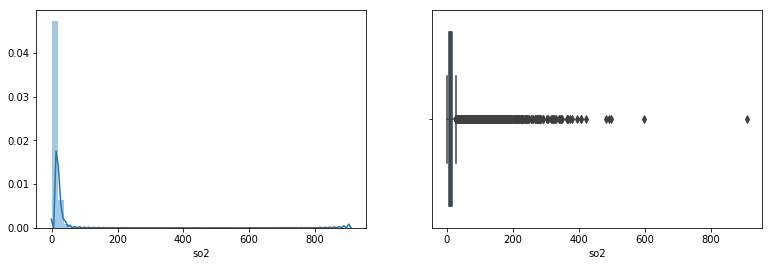

Skewness =  8.521026971966139


In [27]:
print('Distribution of SO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['so2'].dropna() , ax=ax[0])
sns.boxplot(df['so2'].dropna() , ax=ax[1])

so2_skew = df['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

The above distribution plot shows that 'so2' values are significantly Right Skewed(Positively Skewed)<br>
and the box plot shows that there are significant amount of outliers

##### Removing Outliers

Since we saw that 75% of the values lie under 13.7<br>
we can calculate the upper limit using IQR(Inter Quartile Range) and <br>
consider values outside upper limit as outliers and remove them

In [28]:
Q1=df['so2'].quantile(0.25)
Q3=df['so2'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['so2']<(Q1-1.5*IQR))|(df['so2']>(Q3+1.5*IQR)))]

Distribution of SO2


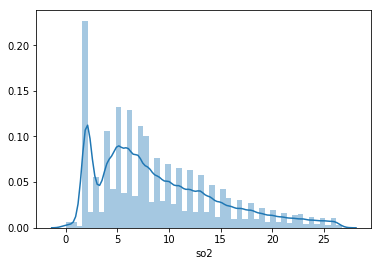

Skewness =  0.8881595669996004


In [29]:
print('Distribution of SO2')
sns.distplot(df['so2'].dropna())

so2_skew = df['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

The above distribution plot shows the significant Positive Skewness has been reduced to acceptable level

##### Treating Missing Values

In [30]:
print('The number of missing values in SO2 are : ' , df['so2'].isna().sum())

The number of missing values in SO2 are :  34643


Distribution of SO2


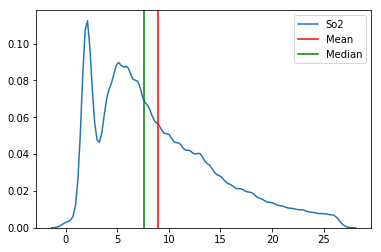

In [31]:
print('Distribution of SO2')
sns.kdeplot(df['so2'].dropna())
plt.axvline(df['so2'].mean(), color='r')
plt.axvline(df['so2'].median(), color='g')

plt.legend(['So2','Mean','Median'])
plt.show()

In [32]:
df1= df.copy()
df2=df.copy()

Mean Imputation

In [33]:
df1['so2'] = df1['so2'].fillna(df1['so2'].mean())

Forward Fill

In [34]:
df2['so2'] = df2['so2'].fillna(method='ffill')

Distribution of SO2


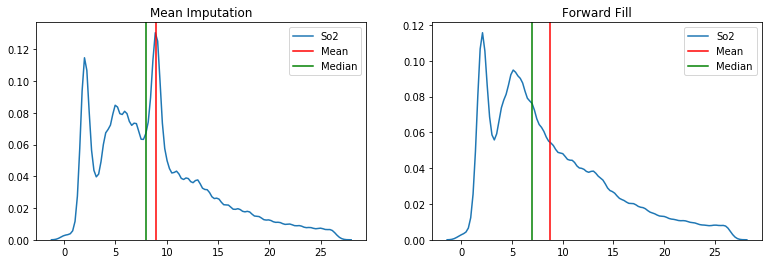

In [35]:
print('Distribution of SO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['so2'] , ax=ax[0])
ax[0].axvline(df1['so2'].mean(), color='r' )
ax[0].axvline(df1['so2'].median(), color='g')
ax[0].set_title('Mean Imputation')  
ax[0].legend(['So2','Mean','Median'])

sns.kdeplot(df2['so2'] , ax=ax[1])
ax[1].axvline(df2['so2'].mean(), color='r')
ax[1].axvline(df2['so2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['So2','Mean','Median'])
                    
                    
plt.show()

The above plots show that filling the missing values with Forward Fill dosen't cause any variation on the data, so we can choose Forward Fill

In [36]:
df['so2'] = df['so2'].fillna(method='ffill')

<br><br>

<h4> <u> 'no2' - column

In [37]:
df['no2'].describe()

count    396375.000000
mean         24.734928
std          17.113930
min           0.000000
25%          13.800000
50%          21.000000
75%          31.000000
max         876.000000
Name: no2, dtype: float64

The above information shows that 75% of the values are within the value 30.8 and the maximum value is 876.0<br>
This means that there are outliers 

Distribution of NO2


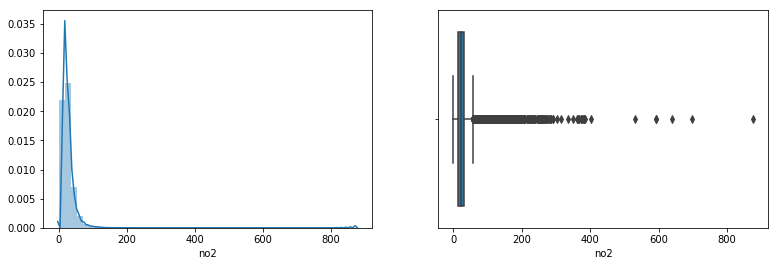

Skewness =  3.5414717457036953


In [38]:
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['no2'].dropna() , ax=ax[0])
sns.boxplot(df['no2'].dropna() , ax=ax[1])
no2_skew = df['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

The above distribution plot shows that 'no2' values are significantly Right Skewed(Positively Skewed)<br>
and the box plot shows that there are significant amount of outliers

##### Removing Outliers

Since we saw that 75% of the values lie under 31.0<br>
we can calculate the upper limit using IQR(Inter Quartile Range) and <br>
consider values outside upper limit as outliers and remove them

In [39]:
Q1=df['no2'].quantile(0.25)
Q3=df['no2'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['no2']<(Q1-1.5*IQR))|(df['no2']>(Q3+1.5*IQR)))]

Distribution of NO2


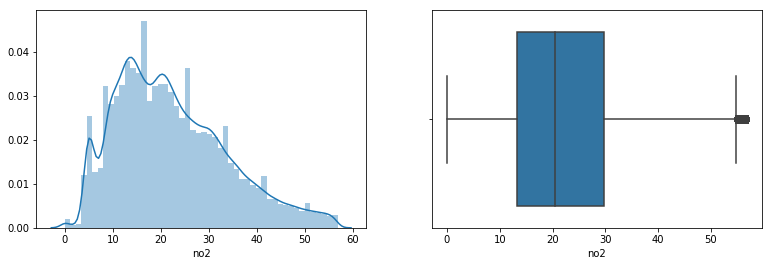

Skewness =  0.6614815004927441


In [40]:
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['no2'].dropna() , ax=ax[0])
sns.boxplot(df['no2'].dropna() , ax=ax[1])
no2_skew = df['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

The above distribution plot shows the significant Positive Skewness has been reduced to acceptable level

##### Treating Missing Values

In [41]:
print('The number of missing values in NO2 are : ' , df['no2'].isna().sum())

The number of missing values in NO2 are :  16167


Distribution of NO2


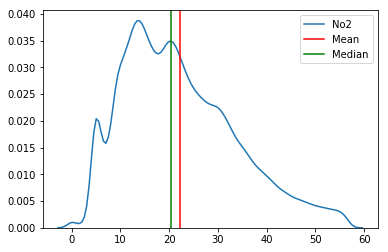

In [42]:
print('Distribution of NO2')
sns.kdeplot(df['no2'])
plt.axvline(df['no2'].mean(), color='r')
plt.axvline(df['no2'].median(), color='g')
plt.legend(['No2','Mean','Median'])
plt.show()

In [43]:
df1 = df.copy()
df2 = df.copy()

In [44]:
#Mean Imputation
df1['no2'] = df1['no2'].fillna(df1['no2'].mean())
#Forward Fill
df2['no2'] = df2['no2'].fillna(method='ffill')

Distribution of NO2


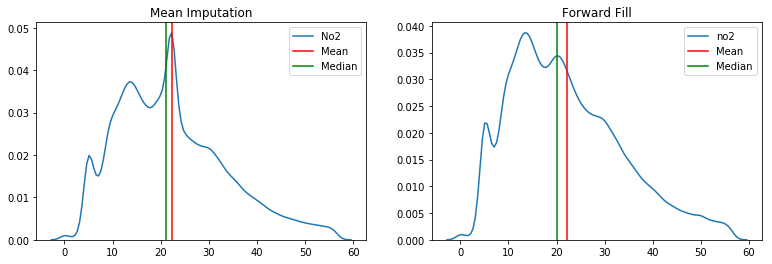

In [45]:
print('Distribution of NO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['no2'] , ax=ax[0])
ax[0].axvline(df1['no2'].mean(), color='r' )
ax[0].axvline(df1['no2'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['No2','Mean','Median'])

sns.kdeplot(df2['no2'] , ax=ax[1])
ax[1].axvline(df2['no2'].mean(), color='r')
ax[1].axvline(df2['no2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['no2','Mean','Median'])
                    
                    
plt.show()

The above plots show that filling the missing values with Forward Fill dosen't cause any variation on the data, so we can choose Forward Fill

In [46]:
df['no2'] = df['no2'].fillna(method='ffill')

<br><br>

<h4> <u> 'rspm' - column

In [47]:
df['rspm'].describe()

count    361301.000000
mean        104.466161
std          71.131097
min           0.000000
25%          55.000000
50%          87.000000
75%         135.000000
max        6307.033333
Name: rspm, dtype: float64

The above information shows that 75% of the values are within the value 135.0 and the maximum value is 6307.03<br>
This means that there are outliers 

Distribution of RSPM


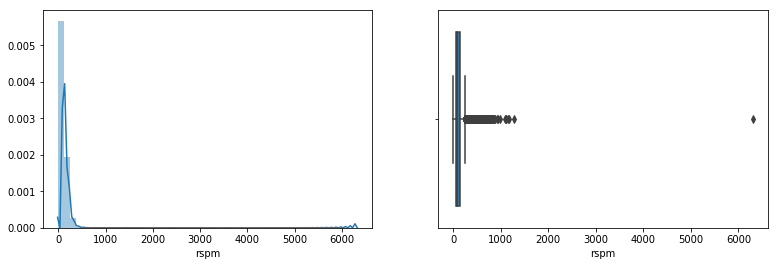

Skewness =  3.5635618320679323


In [48]:
print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['rspm'].dropna() , ax=ax[0])
sns.boxplot(df['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',df['rspm'].skew())

The above distribution plot shows that 'rspm' values are significantly Right Skewed(Positively Skewed)<br>
and the box plot shows that there are significant amount of outliers

##### Removing Outliers

Since we saw that 75% of the values lie under 135.0
we can calculate the upper limit using IQR(Inter Quartile Range) and
consider values outside upper limit as outliers and remove them

In [49]:
Q1=df['rspm'].quantile(0.25)
Q3=df['rspm'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['rspm']<(Q1-1.5*IQR))|(df['rspm']>(Q3+1.5*IQR)))]

Distribution of RSPM


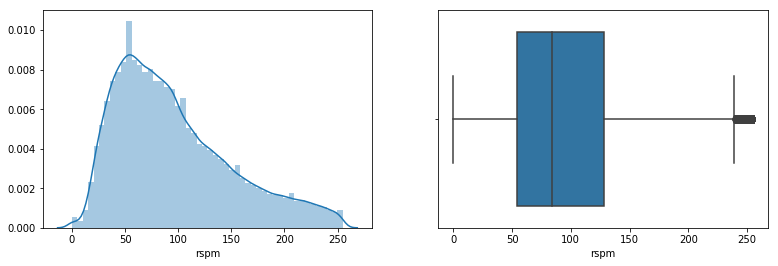

Skewness =  0.8297993158420551


In [50]:
print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['rspm'].dropna() , ax=ax[0])
sns.boxplot(df['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',df['rspm'].skew())

The above plots show that significant Positiv Skwewness is reduced and the outliers are removed

##### Treating Missing Values

In [51]:
print('The number of missing values in RSPM are : ' , df['rspm'].isna().sum())

The number of missing values in RSPM are :  33626


In [52]:
df1 = df.copy()
df2 = df.copy()

In [53]:
#Mean Imputation
df1['rspm'] = df1['rspm'].fillna(df1['rspm'].mean())
#Forward Fill
df2['rspm'] = df2['rspm'].fillna(method='ffill')

Distribution of RSPM


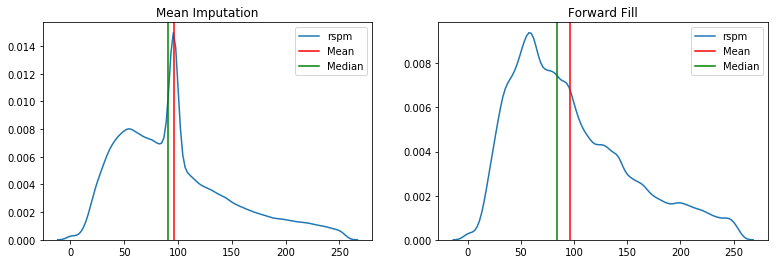

In [54]:
print('Distribution of RSPM')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['rspm'] , ax=ax[0])
ax[0].axvline(df1['rspm'].mean(), color='r' )
ax[0].axvline(df1['rspm'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['rspm','Mean','Median'])

sns.kdeplot(df2['rspm'] , ax=ax[1])
ax[1].axvline(df2['rspm'].mean(), color='r')
ax[1].axvline(df2['rspm'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['rspm','Mean','Median'])
                    
                    
plt.show()

The above plots show that filling the missing values with Forward Fill dosen't cause any variation on the data, so we can choose Forward Fill

In [55]:
df['rspm'] = df['rspm'].fillna(method='ffill')

---